# Python file for training FNO

In [1]:
import random
import torch
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer

sys.path.append('../')
from models import FNN1d, FNN1d_train
prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/"


# Darcy equation solver
$$-\nabla (a \nabla u) = f$$

In [2]:
darcy_as = np.load(prefix+"darcy_a.npy")
darcy_us_ref = np.load(prefix+"darcy_u.npy")


In [4]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**14
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 32
d_f = 32
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.1476301160582807  Rel. Test L2 Loss :  0.03670573808631161  Test L2 Loss :  0.1326889921037946
Epoch :  10  Rel. Train L2 Loss :  0.01167851842546952  Rel. Test L2 Loss :  0.010566048879809387  Test L2 Loss :  0.03954440551751759
epochs =  11 elapsed time =  181.13013621466234


In [13]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**13
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 6
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.14040614537952933  Rel. Test L2 Loss :  0.056555189803475514  Test L2 Loss :  0.21334419591585174
Epoch :  10  Rel. Train L2 Loss :  0.018617707890371094  Rel. Test L2 Loss :  0.025725485324073816  Test L2 Loss :  0.07820896364864893
epochs =  11 elapsed time =  506.9702727040276


In [ ]:
Ne_ref = 2**12
n_train = n_test = 2**14
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  1022.8753047250211

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  509.5362855917774


Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 32
d_f = 32
epochs =  11 elapsed time =  88

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 128
d_f = 128
epochs =  11 elapsed time =  281.1660668849945

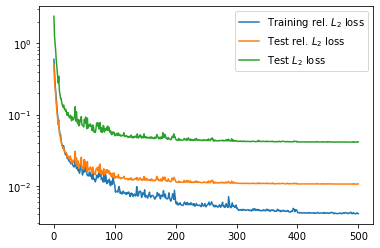

In [20]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

# Heat equation
$$
u_t - \triangle u = f
$$

In [3]:
heat_u0s    = np.load(prefix+"heat_u0.npy")
heat_fs     = np.load(prefix+"heat_f.npy")
heat_us_ref = np.load(prefix+"heat_u.npy")


In [4]:
torch.manual_seed(0)
np.random.seed(0)


downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**10
x_train = torch.from_numpy(np.stack((heat_u0s[0:n_train, 0::downsample_ratio], heat_fs[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(heat_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((heat_u0s[M//2:M//2+n_test, 0::downsample_ratio], heat_fs[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(heat_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 3
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 1001
# milestones = [200, 300, 400, 500, 800,900]
# scheduler_gamma = 0.5

milestones = [500]
scheduler_gamma = 0.5


batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/test")

Epoch :  0  Rel. Train L2 Loss :  0.8563822181895375  Rel. Test L2 Loss :  0.42145341634750366  Test L2 Loss :  0.013766691117780283
Epoch :  10  Rel. Train L2 Loss :  0.10632621892727911  Rel. Test L2 Loss :  0.064689741586335  Test L2 Loss :  0.0020809300331166014
Epoch :  20  Rel. Train L2 Loss :  0.06583013932686299  Rel. Test L2 Loss :  0.06507667095866054  Test L2 Loss :  0.0022725282615283504
Epoch :  30  Rel. Train L2 Loss :  0.056402505084406585  Rel. Test L2 Loss :  0.054563689860515296  Test L2 Loss :  0.001408764386724215
Epoch :  40  Rel. Train L2 Loss :  0.06541666208067909  Rel. Test L2 Loss :  0.08058407716453075  Test L2 Loss :  0.001962941671081353
Epoch :  50  Rel. Train L2 Loss :  0.06946881697513163  Rel. Test L2 Loss :  0.05597858899272978  Test L2 Loss :  0.0014914488529029768
Epoch :  60  Rel. Train L2 Loss :  0.068682961165905  Rel. Test L2 Loss :  0.0807750680251047  Test L2 Loss :  0.0018788161323755048
Epoch :  70  Rel. Train L2 Loss :  0.05424628942273557  

In [ ]:
k_max = 32
d_f = 32
Epoch :  1000  Rel. Train L2 Loss :  0.002646285909577273  Rel. Test L2 Loss :  0.005841498059453443  Test L2 Loss :  0.00019765041542996187

k_max = 128
d_f = 128
Epoch :  1000  Rel. Train L2 Loss :  0.0005942718698861427  Rel. Test L2 Loss :  0.01795133063569665  Test L2 Loss :  0.00032980215746647445
elu
Epoch :  1000  Rel. Train L2 Loss :  0.001084246430764324  Rel. Test L2 Loss :  0.011242330292589031  Test L2 Loss :  0.0002173154684896872                
                
Epoch :  1000  Rel. Train L2 Loss :  0.0035736724239541218  Rel. Test L2 Loss :  0.00750352768227458  Test L2 Loss :  0.0002495344524504617

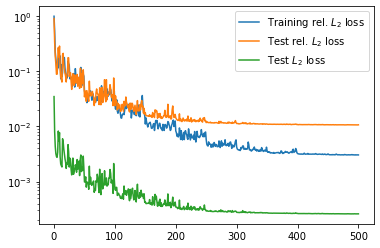

In [34]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

# PCA Linear regression

In [52]:
def PCA_preprocess(data, n):
    n = min(n, min(data.shape))
    U,S,V = np.linalg.svd(data, full_matrices=False)
    # return compressed data[:, n], basis[n, :]
    return U[:,0:n]*S[0:n], V[0:n, :]

def PCA_learn(heat_u0s, heat_fs, heat_us_ref, n_bases = 128, n_train = 2**10, downsample_ratio=1):
    # downsample_ratio = 1
    L, Ne_ref = 1.0, 2**12
    Ne = Ne_ref//downsample_ratio

    grid = np.linspace(0, L, Ne+1)
    M = 2**15
    # n_train = n_test = 2**10
    # n_bases = 128
    n_test = n_train 
    x_train_u0s = heat_u0s[0:n_train, 0::downsample_ratio]
    x_train_fs  = heat_fs[0:n_train, 0::downsample_ratio]
    y_train_us  = heat_us_ref[0:n_train, 0::downsample_ratio]

    x_test_u0s  = heat_u0s[M//2:M//2+n_test, 0::downsample_ratio]
    x_test_fs  = heat_fs[M//2:M//2+n_test, 0::downsample_ratio]
    y_test_us   = heat_us_ref[M//2:M//2+n_test, 0::downsample_ratio]

    x_train_u0s_cdata, x_train_u0s_basis = PCA_preprocess(x_train_u0s, n_bases)
    x_train_fs_cdata,  x_train_fs_basis  = PCA_preprocess(x_train_fs,  n_bases)
    y_train_us_cdata,  y_train_us_basis  = PCA_preprocess(y_train_us,  n_bases)
    x_train = np.hstack((x_train_u0s_cdata, x_train_fs_cdata, np.ones((n_train,1))))
    y_train = y_train_us_cdata


    lstsq_sol, residuals, _, _= np.linalg.lstsq(x_train, y_train)
    # np.dot(x_train, lstsq_sol) - y_train

    x_test_u0s_cdata = np.dot(x_test_u0s, x_train_u0s_basis.transpose())
    x_test_fs_cdata = np.dot(x_test_fs, x_train_fs_basis.transpose() )
    x_test = np.hstack((x_test_u0s_cdata, x_test_fs_cdata, np.ones((n_test,1))))
    y_test_us_pred   = np.dot(np.dot(x_test, lstsq_sol), y_train_us_basis)

    test_l2_loss = np.mean(np.linalg.norm(y_test_us_pred - y_test_us, axis=1)/np.sqrt(Ne)) 
    test_rel_l2_loss  = np.mean(np.linalg.norm(y_test_us_pred - y_test_us, axis=1)/np.linalg.norm(y_test_us, axis=1) ) 

    return test_l2_loss, test_rel_l2_loss




In [5]:
n_data_array = np.array([256, 512, 1024, 2048, 4096, 8192])
n_bases_array = np.array([32, 64, 128, 256])
downsample_ratio_array = np.array([1, 2, 4, 8])

test_l2_losses, test_rel_l2_losses = np.zeros((len(n_data_array), len(n_bases_array), len(downsample_ratio_array))), np.zeros((len(n_data_array), len(n_bases_array), len(downsample_ratio_array)))



In [ ]:
for i, n_data in enumerate(n_data_array):
    for j, n_bases in enumerate(n_bases_array):
        for k, downsample_ratio in enumerate(downsample_ratio_array):
            test_l2_losses[i,j,k], test_rel_l2_losses[i,j,k] = PCA_learn(heat_u0s, heat_fs, heat_us_ref, n_bases = n_bases, n_train = n_data, downsample_ratio=downsample_ratio)

        
np.save("heat_PCA_test_l2_losses.npy", test_l2_losses)
np.save("heat_PCA_test_rel_l2_losses.npy", test_rel_l2_losses)

In [6]:
test_l2_losses = np.load("heat_PCA_test_l2_losses.npy")
test_rel_l2_losses = np.load("heat_PCA_test_rel_l2_losses.npy")

Text(0, 0.5, 'Training data size')

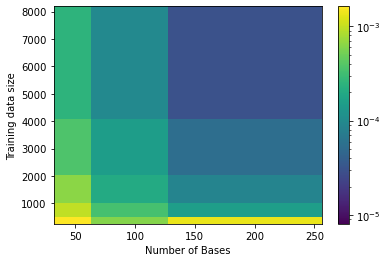

In [7]:
import matplotlib.colors as colors
Z = test_rel_l2_losses[:,:,0]
plt.pcolormesh(n_bases_array, n_data_array, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()
plt.xlabel("Number of Bases")
plt.ylabel("Training data size")

Text(0, 0.5, 'Rel. L₂ error')

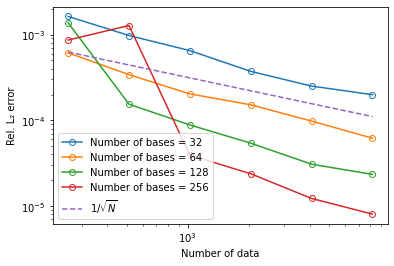

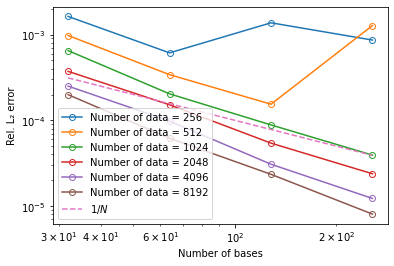

In [8]:

plt.figure()
for j, n_bases in enumerate(n_bases_array):
    plt.loglog(n_data_array, Z[:, j], "-o", fillstyle="none", label="Number of bases = "+str(n_bases))

plt.loglog(n_data_array, 0.01/np.sqrt(n_data_array), "--", label=r"$1/\sqrt{N}$")
plt.legend()
plt.xlabel("Number of data")
plt.ylabel("Rel. L₂ error")


plt.figure()
for i, n_data in enumerate(n_data_array):
    plt.loglog(n_bases_array, Z[i, :], "-o", fillstyle="none", label="Number of data = "+str(n_data))

plt.loglog(n_bases_array, 0.01/n_bases_array**1.0, "--", label=r"$1/N$")
plt.legend()
plt.xlabel("Number of bases")
plt.ylabel("Rel. L₂ error")

In [97]:
Z

array([[1.62496228e-03, 6.11630463e-04, 1.37009902e-03, 8.62059821e-04],
       [9.74121458e-04, 3.40549176e-04, 1.54140765e-04, 1.27402772e-03],
       [6.49451481e-04, 2.03435268e-04, 8.83689377e-05, 3.93013230e-05],
       [3.72143200e-04, 1.51718296e-04, 5.41887081e-05, 2.38226790e-05],
       [2.50508500e-04, 9.80025762e-05, 3.07675739e-05, 1.22802364e-05],
       [1.99080260e-04, 6.18894867e-05, 2.34678531e-05, 8.06887789e-06]])